## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt # pyplot is a 
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline
import dataframe_image as dfi

In [ ]:
# Observations:
# According to graph “Linear Regression Model of Mouse Weight vs Tumor Volume”, mouse weights and their tumor volumes have 0.84 correlation coefficient which is closely to be a perfect positive correlation
# According to graph “Line Plot - Capomulin Treatment Results of Mouse s185”, Capomulin regimen has significant efficacy on reducing tumor volume for Mouse s185.
# According to graph “BoxPlot - Final Tumor Volume of each Regimens” Capomulin regimen treatment results has the lowest standard error among Capomulin, Ramicane, Infubinol, and Ceftamin.


In [2]:
# pip install dataframe_image

In [3]:
# Notes: https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

In [4]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
    # display dataframe up to Row 4 by using "iloc[]".
display(mouse_metadata.iloc[0:5])

   
study_results = pd.read_csv(study_results_path)
    # print only the first few rows of the dataframe by using "head()"
study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the two datasets into a single dataset with "on" and "how"
merged_dataset = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how= "left")

# Display the data table for preview
display(merged_dataset)

    # Combine the two datasets into a single dataset WITHOUT "on" and "how". 
    # QUESTION: when will be neccessary to include"on" and "how"?
pd.merge(mouse_metadata, study_results)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Check the number of mice.
    # print the length of "Mouse ID" that only count each mouse ID once.
len(merged_dataset["Mouse ID"].unique())

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
    # loc vs. iloc: 
        # "loc" is label-based (need to specify rows or columns by their names)
        # "iloc" is integer index-based (rows or columns need to be specified by their integer index)
    # (need more digestion of this code)
duplicate_mouse_id = merged_dataset.loc[merged_dataset.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id
    # Mouse ID g989 has duplicated mouse ID and timepoints

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID
    # "isin" drops duplicate_mouse_id.
        # isin(duplicate_mouse_id) == False, DON'T keep data identified as "duplicate_mouse_id"
        # isin(duplicate_mouse_id) == True, KEEP ONLY data identified as "duplicate_mouse_id"
        # refer to https://www.geeksforgeeks.org/python-pandas-dataframe-isin/ for examples.
duplicate_mouse_data = merged_dataset[merged_dataset['Mouse ID'].isin(duplicate_mouse_id)==True]
duplicate_mouse_data

    # Another way to get all the data for the duplicate mouse ID is by using "loc" to identify the rows with mouse ID "g989"
        #duplicate_mouse_data = merged_dataset.loc[merged_dataset["Mouse ID"] == "g989"]
        # duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_dataset = merged_dataset[merged_dataset['Mouse ID'].isin(duplicate_mouse_id)==False]
clean_merged_dataset
    # clean_merged_dataset dropped 13 rows which contain dublicated Mouse ID g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
len(clean_merged_dataset["Mouse ID"])
    
    # this gives the mouse ID counts, but not neccessary the number of the mice, because each mouse ID appearses multiple times.
    # Another way to get the number of mice is by using "count()"
    # clean_merged_dataset["Mouse ID"].count()

1880

In [11]:
    # To get the number of mouse ID representing the number of mice in the clean DataFrame, add "unique()".
len(clean_merged_dataset["Mouse ID"].unique())
    # one mouse ID has been dropped. Total number of mouse ID decrease to 248 from 249.

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

    # use groupby to group data based on regimen type and then get the mean of the tumor volumes within the regimen group.
regimen_mean = round(clean_merged_dataset.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"], 2)
regimen_median = round(clean_merged_dataset.groupby('Drug Regimen').median()["Tumor Volume (mm3)"], 2)
regimen_var = round(clean_merged_dataset.groupby('Drug Regimen').var()["Tumor Volume (mm3)"], 2)
regimen_std = round(clean_merged_dataset.groupby('Drug Regimen').std()["Tumor Volume (mm3)"], 2)
regimen_sem = round(clean_merged_dataset.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"], 2)
    # round() function rounds up to the number of decimals of your choice.

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({"Mean":regimen_mean, 
                              "Median": regimen_median, 
                              "Variance":regimen_var, 
                              "Standard D": regimen_std, 
                              "Standard Error": regimen_sem})
summary_table
    # DataFrame comes out to be with column heads on different lines.
    # To put column heads on the same line, use "reset_index()"  
summary_table = summary_table.reset_index()

    # dataframe tables can be saved as images (png, jpg, etc.).
    # but before being able to do so, dataframe_image needs to be installed.
    # dataframe_image can be installed directly by "pip install dataframe_image" in a notebook cell inside the same jupyter notebook.
    # before saving the tables, create a folder that you want to save the images to, otherwise the image will be saved to the same folder as where this jupyter notebook is.
dfi.export(summary_table, 'My HW Images/summary_table.jpg')
summary_table

,Drug Regimen,Mean,Median,Variance,Standard D,Standard Error
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.32,50.45,43.85,6.62,0.54
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.82,48.53,6.97,0.52


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_summary_table = round(
    clean_merged_dataset.groupby("Drug Regimen").
    agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
    ), 2)
aggregated_summary_table = aggregated_summary_table.reset_index()

dfi.export(aggregated_summary_table, 'My HW Images/aggregated_summary_table.jpg')
aggregated_summary_table

Drug Regimen Tumor Volume (mm3)                          
                             mean median    var   std   sem
0    Capomulin              40.68  41.56  24.95  4.99  0.33
1     Ceftamin              52.59  51.78  39.29  6.27  0.47
2    Infubinol              52.88  51.82  43.13  6.57  0.49
3     Ketapril              55.24  53.70  68.55  8.28  0.60
4     Naftisol              54.33  52.51  66.17  8.13  0.60
5      Placebo              54.03  52.29  61.17  7.82  0.58
6     Propriva              52.32  50.45  43.85  6.62  0.54
7     Ramicane              40.22  40.67  23.49  4.85  0.32
8     Stelasyn              54.23  52.43  59.45  7.71  0.57
9    Zoniferol              53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

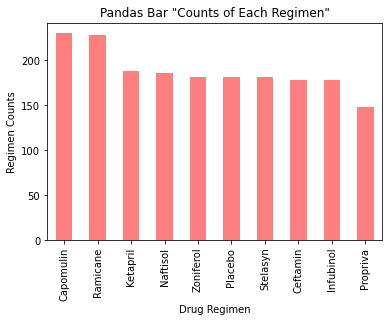

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pandas_treatment_counts = clean_merged_dataset['Drug Regimen'].value_counts()
    # "clean_merged_dataset['Drug Regimen'].value_counts()" counts how many times each regimen appears in the column "Drug Regimen"
display(pandas_treatment_counts)

pandas_treatment_counts.plot.bar(color = 'red', alpha = 0.5)
    # alpha gives the shade of the color, ranging between 0-1

plt.title('Pandas Bar "Counts of Each Regimen"')
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Counts")

plt.savefig("My HW Images/pandas_treatment_counts.jpg", bbox_inches ="tight")
    # 'bbox_inches ="tight" ' makes the graph fit to the image when saved 


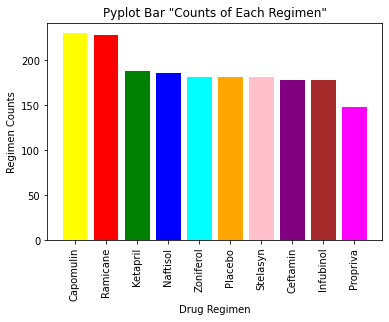

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
pyplot_treatment_counts = clean_merged_dataset['Drug Regimen'].value_counts()
plt.xticks(rotation=90)
plt.bar(pyplot_treatment_counts.index.values, 
        pyplot_treatment_counts.values, 
        color = ['yellow', 'red', 'green', 'blue', 'cyan', 'orange', 'pink', 'purple', 'brown', 'magenta'])

plt.title('Pyplot Bar "Counts of Each Regimen"')
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Counts")

plt.savefig("My HW Images/pyplot_treatment_counts.jpg", bbox_inches ="tight")

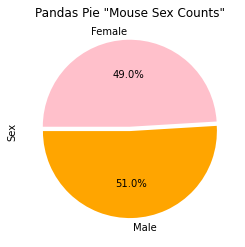

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandas_sex_counts = clean_merged_dataset['Sex'].value_counts()
pandas_sex_counts.plot.pie(colors = ["orange", "pink"], explode=[0, 0.05], autopct= "%0.01f%%", startangle=180)
    # color has to be plural, 'colors'
    # 'autopct = "%1.1f%%"' is used for showing percentages along with the chart

plt.title('Pandas Pie "Mouse Sex Counts"')

plt.savefig("My HW Images/pandas_mouse_sex_counts.jpg")

array(['Male', 'Female'], dtype=object)

array([958, 922], dtype=int64)

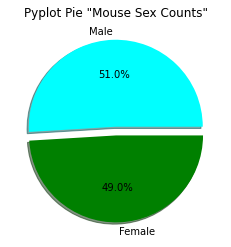

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_merged_dataset['Sex'].value_counts()
display(sex_counts.index.values)
display(sex_counts.values)

# plt.pie(sex_counts.index.values, sex_counts.values)

plt.pie(sex_counts.values, explode=[0.05, 0.05], 
        colors = ["cyan", "green"], 
        labels=sex_counts.index.values, 
        autopct= "%1.1f%%", 
        shadow = True)

plt.title('Pyplot Pie "Mouse Sex Counts"')

plt.savefig("My HW Images/pyplot_mouse_sex_counts.jpg")

# Quartiles, Outliers and Boxplots 
I have spent a long time figuring it out and am still confused.  I need help and will come back to work on it more.

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
target_regimen = clean_merged_dataset.loc[clean_merged_dataset['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
display(target_regimen)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
target_timepoint = target_regimen.loc[target_regimen['Timepoint'] == 45]
    # can be done by pd.DataFrame(target_regimen.groupby("Mouse ID").max()["Timepoint"]) as well
display(target_timepoint.sort_values(['Drug Regimen'], ascending=True))

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
350,v923,Capomulin,Female,19,21,45,40.658124,2
390,r944,Capomulin,Male,12,25,45,41.581521,2
380,l509,Capomulin,Male,17,21,45,41.483008,3
370,s710,Capomulin,Female,1,23,45,40.728578,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
400,e662,Ramicane,Male,8,24,45,40.659006,2
410,u196,Ramicane,Male,18,25,45,40.667713,3
420,q597,Ramicane,Male,20,25,45,45.220869,2
194,j989,Ramicane,Male,8,19,45,36.134852,1


In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(target_timepoint, clean_merged_dataset, on = ("Mouse ID", "Timepoint"), how = "left")
display(merge_df.sort_values(['Drug Regimen_x'], ascending=True))

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
31,v923,Capomulin,Female,19,21,45,40.658124,2,Capomulin,Female,19,21,40.658124,2
35,r944,Capomulin,Male,12,25,45,41.581521,2,Capomulin,Male,12,25,41.581521,2
34,l509,Capomulin,Male,17,21,45,41.483008,3,Capomulin,Male,17,21,41.483008,3
33,s710,Capomulin,Female,1,23,45,40.728578,1,Capomulin,Female,1,23,40.728578,1
32,g316,Capomulin,Female,22,22,45,40.159220,2,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,e662,Ramicane,Male,8,24,45,40.659006,2,Ramicane,Male,8,24,40.659006,2
37,u196,Ramicane,Male,18,25,45,40.667713,3,Ramicane,Male,18,25,40.667713,3
38,q597,Ramicane,Male,20,25,45,45.220869,2,Ramicane,Male,20,25,45.220869,2
18,j989,Ramicane,Male,8,19,45,36.134852,1,Ramicane,Male,8,19,36.134852,1


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
target_regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] # for "for loop" and plot labels

# Create empty list to fill with tumor vol data (for plotting)
target_tumor_vol =[] # for plotting

for regimen in target_regimen_list:
    target_regimen_tumor_volume =merge_df["Tumor Volume (mm3)_x"]

#     a = target_tumor_vol.append(target_regimen_tumor_volume)

print(target_regimen_tumor_volume)
# print(a)

0     22.050126
1     23.343598
2     28.484033
3     28.430964
4     29.128472
        ...    
58    61.386660
59    67.685569
60    68.594745
61    64.729837
62    62.754451
Name: Tumor Volume (mm3)_x, Length: 63, dtype: float64


In [22]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = target_regimen_tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 33.48002734
The upper quartile of final tumor volume is: 62.14221369
The interquartile range of final tumor volume is: 28.66218635
The the median of final tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


In [23]:
# My NOcapomulin_volumes = TE: [] around column heads, but no [] around items under the column heads
capomulin_volumes = clean_merged_dataset.loc[clean_merged_dataset['Drug Regimen'] == 'Capomulin']
ramicane_volumes = clean_merged_dataset.loc[clean_merged_dataset['Drug Regimen'] == 'Ramicane']
infubinol_volumes = clean_merged_dataset.loc[clean_merged_dataset['Drug Regimen'] == 'Infubinol']
ceftamin_volumes = clean_merged_dataset.loc[clean_merged_dataset['Drug Regimen'] == 'Ceftamin']

regimens = [capomulin_volumes, ramicane_volumes, infubinol_volumes, ceftamin_volumes]

In [24]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_final_tumor_vol = clean_merged_dataset.loc[clean_merged_dataset["Drug Regimen"] == 'Capomulin', 'Tumor Volume (mm3)']
ramicane_final_tumor_vol = clean_merged_dataset.loc[clean_merged_dataset["Drug Regimen"] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol_final_tumor_vol = clean_merged_dataset.loc[clean_merged_dataset["Drug Regimen"] == 'Infubinol', 'Tumor Volume (mm3)']
ceftamin_final_tumor_vol = clean_merged_dataset.loc[clean_merged_dataset["Drug Regimen"] == 'Ceftamin', 'Tumor Volume (mm3)']
    
    # add subset 
capomulin_final_tumor_vol.append(capomulin_final_tumor_vol)
ramicane_final_tumor_vol.append(ramicane_final_tumor_vol)
infubinol_final_tumor_vol.append(infubinol_final_tumor_vol)
ceftamin_final_tumor_vol.append(ceftamin_final_tumor_vol)
    
all_final_tumor_vol = [capomulin_final_tumor_vol, 
                       ramicane_final_tumor_vol, 
                       infubinol_final_tumor_vol, 
                       ceftamin_final_tumor_vol]

In [25]:
# Determine outliers using upper and lower bounds
for final_tumor_vol in all_final_tumor_vol:
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    
for regimen in target_regimen_list:
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


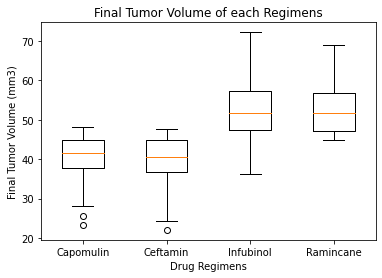

In [26]:
final_tumor_plot = [capomulin_final_tumor_vol, ramicane_final_tumor_vol, infubinol_final_tumor_vol, ceftamin_final_tumor_vol]
Regimen_list = ["Capomulin", "Ceftamin", "Infubinol", "Ramincane"]
colors = ["blue", "green", "red", "black"]


fig2, ax2 = plt.subplots()
ax2.set_title("Final Tumor Volume of each Regimens")
ax2.set_xlabel("Drug Regimens")
ax2.set_ylabel("Final Tumor Volume (mm3)")
ax2.boxplot(final_tumor_plot, labels = Regimen_list, widths = 0.5)

plt.savefig("My HW Images/BoxPlot - Final Tumor Volume of each Regimens.jpg")
plt.show()

## Line and Scatter Plots

In [27]:
# pull all data of target mouse treated with Capomulin
# pd.DataFrame(data = {"Counts":regimen_mouse_tumor_count, "Volumes":regimen_mouse_tumor_sum})
capomulin_full_df = clean_merged_dataset.loc[clean_merged_dataset["Drug Regimen"] == "Capomulin"]
target_mouse_df = capomulin_full_df.loc[capomulin_full_df["Mouse ID"] == "s185"]
display(target_mouse_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


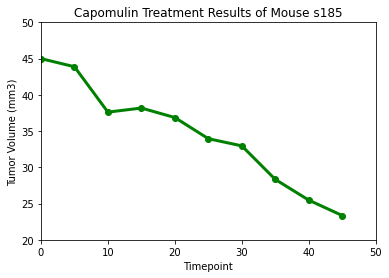

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoint = target_mouse_df["Timepoint"]
s185_tumor_vol = target_mouse_df["Tumor Volume (mm3)"]

s185_Capomulin, ax = plt.subplots()
ax.set_title("Capomulin Treatment Results of Mouse s185")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")
ax.plot(timepoint, s185_tumor_vol, marker='o', linewidth = 3, color='green')

plt.xlim(0, 50)
plt.ylim(20,50)

s185_Capomulin.savefig("My HW Images/Line Plot - Capomulin Treatment Results of Mouse s185.jpg")

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64


Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

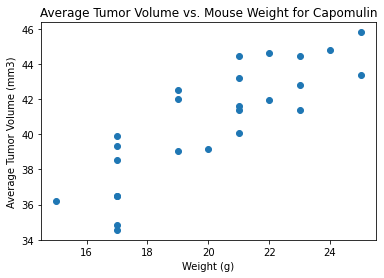

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg_tumor_vol = capomulin_full_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
print(capomulin_avg_tumor_vol)
capomulin_avg_weight = capomulin_full_df.groupby(['Mouse ID']).mean()['Weight (g)']
display(capomulin_avg_weight)

plt.scatter(capomulin_avg_weight, capomulin_avg_tumor_vol)
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig("My HW Images/Scatter Plot - average tumor volume vs. mouse weight for Capomulin .jpg")
plt.show()

(32.0, 47.0)

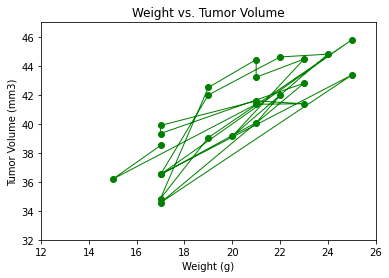

In [30]:
# just for fun: 'Average Tumor Volume vs. Mouse Weight for Capomulin' line plot
weight_volume, ax = plt.subplots()
ax.set_title("Weight vs. Tumor Volume")
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.plot(capomulin_avg_weight, capomulin_avg_tumor_vol, marker='o', linewidth = 1, color='green')

plt.xlim(12, 26)
plt.ylim(32,47)


## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
    # resource: https://realpython.com/numpy-scipy-pandas-correlation-python/#example-pandas-correlation-calculation

In [32]:
# get correlation coefficient using pearson's 
x = capomulin_avg_weight
y = capomulin_avg_tumor_vol
    # correlation = x.corr(y)
correlation = x.corr(y) 
print(f"The correlation coefficient between mouse average weight and their average tumor volume is: {correlation}")
      
    # another way to get correlation coefficient is corr = st.pearsonr(x, y)
st.pearsonr(capomulin_avg_weight, capomulin_avg_tumor_vol)

The correlation coefficient between mouse average weight and their average tumor volume is: 0.8419363424694717


(0.8419363424694717, 1.322572243471279e-07)

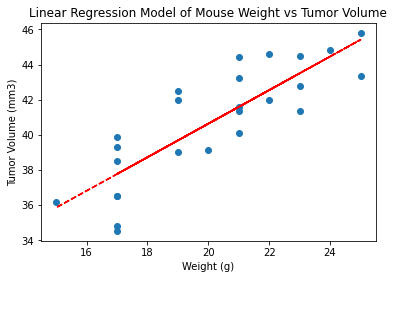

In [33]:
# Add the linear regression equation and line to plot to create a linear regression model
    # for more information and examples, refer to Matplotlib, Folder 3, Activity 9
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, '--', color = "red")
plt.annotate(line_eq, (20,30), fontsize=15)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Linear Regression Model of Mouse Weight vs Tumor Volume")

plt.savefig("My HW Images/Linear Regression Model of Mouse Weight vs Tumor Volume.jpg", bbox_inches = "tight")
plt.show()